<a href="https://colab.research.google.com/github/saketvaibhav7114/EDA-on-Playstore-App/blob/main/EDA_on_Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
file_path_1='/content/drive/MyDrive/Play Store Data.csv'
file_path_2='/content/drive/MyDrive/User Reviews.csv'
df1=pd.read_csv(file_path_1)
df2=pd.read_csv(file_path_2)

# Merging the two dataset

In [253]:
df=pd.merge(df1,df2,how='outer',on='App')

# Step 1: Data Understanding
* Dataframe shape
* Head & Tail
* Dtype
* Describe 





In [254]:
df.shape

(134710, 17)

In [255]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN


In [256]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134710 entries, 0 to 134709
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     134710 non-null  object 
 1   Category                131971 non-null  object 
 2   Rating                  130458 non-null  float64
 3   Reviews                 131971 non-null  object 
 4   Size                    131971 non-null  object 
 5   Installs                131971 non-null  object 
 6   Type                    131970 non-null  object 
 7   Price                   131971 non-null  object 
 8   Content Rating          131970 non-null  object 
 9   Genres                  131971 non-null  object 
 10  Last Updated            131971 non-null  object 
 11  Current Ver             131963 non-null  object 
 12  Android Ver             131968 non-null  object 
 13  Translated_Review       74103 non-null   object 
 14  Sentiment           

In [258]:
df.describe()

,Rating,Sentiment_Polarity,Sentiment_Subjectivity
count,130458.000000,74113.000000,74113.000000
mean,4.313525,0.158436,0.493650
std,0.311306,0.333733,0.241525
min,1.000000,-1.000000,0.000000
25%,4.200000,0.000000,0.377273
50%,4.400000,0.130000,0.509091
75%,4.500000,0.358333,0.633333
max,19.000000,1.000000,1.000000


In [259]:
df.isnull().sum()

App                           0
Category                   2739
Rating                     4252
Reviews                    2739
Size                       2739
Installs                   2739
Type                       2740
Price                      2739
Content Rating             2740
Genres                     2739
Last Updated               2739
Current Ver                2747
Android Ver                2742
Translated_Review         60607
Sentiment                 60597
Sentiment_Polarity        60597
Sentiment_Subjectivity    60597
dtype: int64

# Preparing the data for visualization


*   Dropping Unnecessary Columns
*   Data Cleaning

*   Checking Outliers
*   Data Manipulation





## Dropping unwanted columns

In [260]:
df=df.drop(['Translated_Review','Sentiment'],axis=1)

## Filling Rating columns with median values

In [261]:
df['Rating']=df['Rating'].fillna(df['Rating'].median())

In [262]:
df['Sentiment_Polarity']=df['Sentiment_Polarity'].fillna(df['Sentiment_Polarity'].median())

In [263]:
df['Sentiment_Subjectivity']=df['Sentiment_Subjectivity'].fillna(df['Sentiment_Subjectivity'].median())

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134710 entries, 0 to 134709
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     134710 non-null  object 
 1   Category                131971 non-null  object 
 2   Rating                  134710 non-null  float64
 3   Reviews                 131971 non-null  object 
 4   Size                    131971 non-null  object 
 5   Installs                131971 non-null  object 
 6   Type                    131970 non-null  object 
 7   Price                   131971 non-null  object 
 8   Content Rating          131970 non-null  object 
 9   Genres                  131971 non-null  object 
 10  Last Updated            131971 non-null  object 
 11  Current Ver             131963 non-null  object 
 12  Android Ver             131968 non-null  object 
 13  Sentiment_Polarity      134710 non-null  float64
 14  Sentiment_Subjectivi

## Cleanup (Remove nan values and duplicates)

In [265]:
df.dropna(how='any',inplace=True)

In [266]:
df.shape

(131959, 15)

In [267]:
df.isnull().sum()

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [268]:
df.duplicated().sum()

86547

In [269]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)

In [270]:
df.duplicated().sum()

0

In [271]:
df.shape

(45412, 15)

## Checking The Outliers

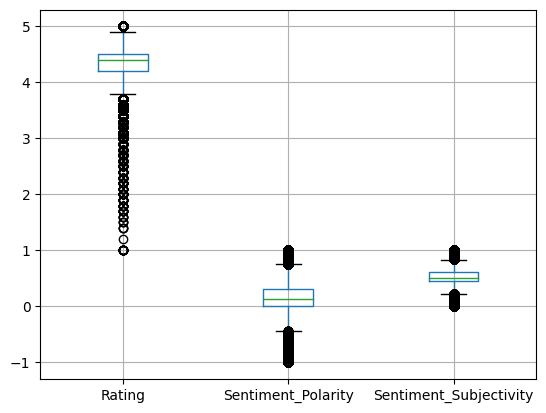

In [272]:
df.boxplot();

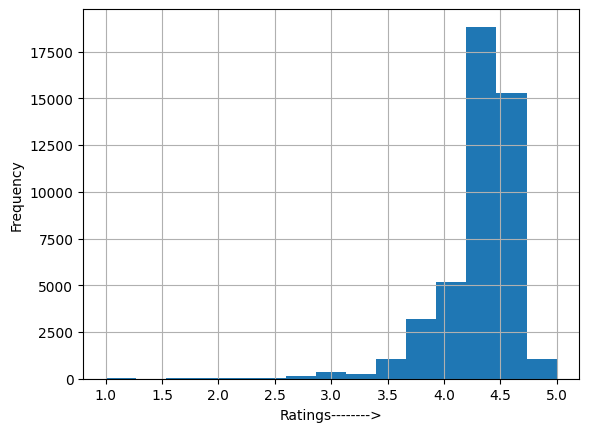

In [273]:
df['Rating'].plot(kind='hist',range=(1,5),bins=15)
plt.xlabel('Ratings-------->')
plt.grid()

In [274]:
df['Category'].value_counts().sort_values(ascending=False)

GAME                   9938
FAMILY                 5096
TOOLS                  2152
HEALTH_AND_FITNESS     1933
PRODUCTIVITY           1866
SPORTS                 1750
FINANCE                1748
TRAVEL_AND_LOCAL       1730
PHOTOGRAPHY            1650
MEDICAL                1503
COMMUNICATION          1456
DATING                 1394
PERSONALIZATION        1354
SOCIAL                 1138
LIFESTYLE              1127
SHOPPING               1080
NEWS_AND_MAGAZINES     1052
BUSINESS               1016
ENTERTAINMENT           864
BOOKS_AND_REFERENCE     793
EDUCATION               770
FOOD_AND_DRINK          698
HOUSE_AND_HOME          471
VIDEO_PLAYERS           448
LIBRARIES_AND_DEMO      366
ART_AND_DESIGN          344
AUTO_AND_VEHICLES       315
MAPS_AND_NAVIGATION     292
WEATHER                 262
PARENTING               261
BEAUTY                  237
EVENTS                  189
COMICS                  119
Name: Category, dtype: int64

Text(0, 0.5, 'App Category-------->')

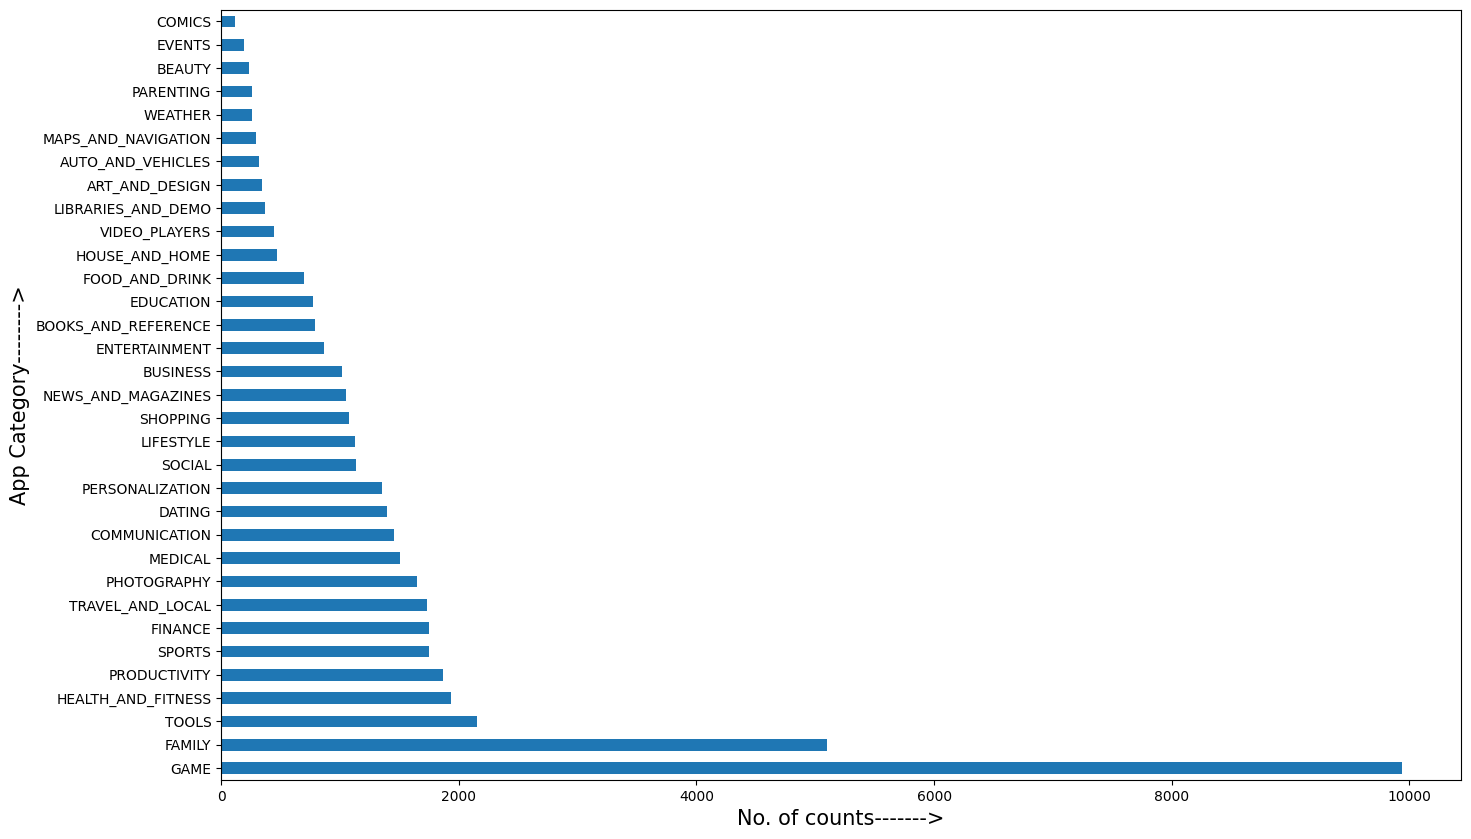

In [275]:
# Plotting the number of each category
plt.figure(figsize=(16,10))
df['Category'].value_counts().plot(kind='barh');
plt.xlabel('No. of counts------->',fontsize=15)
plt.ylabel('App Category-------->',fontsize=15)

## Data Manipulation

### Last Updated

In [276]:
# Converting Last Updated columns into datetime format
df['Last Updated']=pd.to_datetime(df['Last Updated'],format='%B %d, %Y')

### Reviews

In [277]:
# Converting the data type of reviews from object type to int type
df['Reviews']=df['Reviews'].apply(lambda x:int(x))
df['Reviews']

0           159
1           967
2           967
3           967
4           967
          ...  
45407        38
45408         4
45409         3
45410       114
45411    398307
Name: Reviews, Length: 45412, dtype: int64

In [278]:
# Sorting reviews columns
df.sort_values(by=['Size'],ascending=False,inplace=True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment_Polarity,Sentiment_Subjectivity
8667,Domino's Pizza USA,FOOD_AND_DRINK,4.7,1032935,Varies with device,"10,000,000+",Free,0,Everyone,Food & Drink,2018-07-20,Varies with device,Varies with device,0.314286,0.828571
10048,Google Fit - Fitness Tracking,HEALTH_AND_FITNESS,3.9,249855,Varies with device,"10,000,000+",Free,0,Everyone,Health & Fitness,2018-07-24,Varies with device,Varies with device,0.700000,0.600000
41016,Dictionary.com: Find Definitions for English W...,BOOKS_AND_REFERENCE,4.6,899010,Varies with device,"10,000,000+",Free,0,Everyone,Books & Reference,2018-07-30,Varies with device,Varies with device,0.130000,0.509091
41020,Zalo – Video Call,COMMUNICATION,4.2,1042170,Varies with device,"50,000,000+",Free,0,Everyone,Communication,2018-07-27,Varies with device,Varies with device,0.130000,0.509091
10052,Sports Tracker Running Cycling,HEALTH_AND_FITNESS,4.5,190247,Varies with device,"5,000,000+",Free,0,Everyone,Health & Fitness,2018-08-03,Varies with device,Varies with device,0.130000,0.509091


### Size

In [279]:
# Converting the data type of size from object to int
print(df['Size'])
print()
# Checking the number of rows with size having values 'Values with Device'
len(df[df['Size']=="Varies with device"])

8667     Varies with device
10048    Varies with device
41016    Varies with device
41020    Varies with device
10052    Varies with device
                ...        
41758                  1.0M
45379                  1.0M
41164                  1.0M
42735                  1.0M
44572                  1.0M
Name: Size, Length: 45412, dtype: object



13637

In [280]:
# replace 'Varies with device' with 'nan' value
df["Size"].replace('Varies with device',np.nan,inplace=True)
df['Size']
len(df[df['Size']==np.nan])
len(df[df['Size']=="Varies with device"])

0

In [281]:
# Converting size which ends with K and M
def convert_size(size):
  if size is not np.nan:
    if 'k' in size:
      return float(size.replace('k',''))*1000
    if 'M' in size:
      return float(size.replace('M',''))*1000000

# apply convert size
df['Size']=df["Size"].apply(convert_size)

In [282]:
# set NaN value to mean
df['Size'].fillna(df['Size'].mean(),inplace=True)
len(df[df['Size']==np.nan])

0

In [283]:
# Find out 20 most review app
df.sort_values(by=['Size'],ascending=False,inplace=True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment_Polarity,Sentiment_Subjectivity
40125,Ultimate Tennis,SPORTS,4.3,183004,100000000.0,"10,000,000+",Free,0,Everyone,Sports,2018-07-19,2.29.3118,4.0.3 and up,0.13,0.509091
18971,Hungry Shark Evolution,GAME,4.5,6074334,100000000.0,"100,000,000+",Free,0,Teen,Arcade,2018-07-25,6.0.0,4.1 and up,0.13,0.509091
18973,Hungry Shark Evolution,GAME,4.5,6071542,100000000.0,"100,000,000+",Free,0,Teen,Arcade,2018-07-25,6.0.0,4.1 and up,0.13,0.509091
19421,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100000000.0,"5,000,000+",Free,0,Everyone,Sports,2018-07-20,3.04.1,4.0.3 and up,0.13,0.509091
42082,SimCity BuildIt,FAMILY,4.5,4218587,100000000.0,"50,000,000+",Free,0,Everyone 10+,Simulation,2018-06-19,1.23.3.75024,4.0 and up,0.13,0.509091


### Install

In [284]:
df['Installs'].head()

40125     10,000,000+
18971    100,000,000+
18973    100,000,000+
19421      5,000,000+
42082     50,000,000+
Name: Installs, dtype: object

In [285]:
# Removing "+" & "," symbol from the digit
# Converting the data type from object to integer

def convert_install(num):
  return int(num.replace('+','').replace(',',''))

df['Installs']=df['Installs'].apply(convert_install)
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment_Polarity,Sentiment_Subjectivity
40125,Ultimate Tennis,SPORTS,4.3,183004,100000000.0,10000000,Free,0,Everyone,Sports,2018-07-19,2.29.3118,4.0.3 and up,0.13,0.509091
18971,Hungry Shark Evolution,GAME,4.5,6074334,100000000.0,100000000,Free,0,Teen,Arcade,2018-07-25,6.0.0,4.1 and up,0.13,0.509091
18973,Hungry Shark Evolution,GAME,4.5,6071542,100000000.0,100000000,Free,0,Teen,Arcade,2018-07-25,6.0.0,4.1 and up,0.13,0.509091
19421,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100000000.0,5000000,Free,0,Everyone,Sports,2018-07-20,3.04.1,4.0.3 and up,0.13,0.509091
42082,SimCity BuildIt,FAMILY,4.5,4218587,100000000.0,50000000,Free,0,Everyone 10+,Simulation,2018-06-19,1.23.3.75024,4.0 and up,0.13,0.509091


### Types

In [286]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [287]:
df['Type'].value_counts()

Free    44303
Paid     1109
Name: Type, dtype: int64

### Price

In [288]:
df['Price'].unique()

array(['0', '$0.99', '$15.99', '$2.99', '$29.99', '$7.49', '$4.77',
       '$1.99', '$1.49', '$4.99', '$9.99', '$2.49', '$3.99', '$5.99',
       '$33.99', '$4.49', '$24.99', '$19.40', '$4.60', '$14.99', '$6.99',
       '$3.61', '$11.99', '$399.99', '$19.99', '$7.99', '$79.99', '$2.56',
       '$12.99', '$4.59', '$3.90', '$5.49', '$3.95', '$3.49', '$2.50',
       '$8.99', '$2.95', '$74.99', '$1.00', '$15.46', '$1.61', '$4.29',
       '$10.00', '$17.99', '$6.49', '$39.99', '$4.85', '$28.99', '$19.90',
       '$9.00', '$16.99', '$89.99', '$1.20', '$8.49', '$13.99', '$1.70',
       '$46.99', '$1.59', '$400.00', '$1.75', '$109.99', '$3.88',
       '$154.99', '$4.84', '$389.99', '$14.00', '$1.97', '$1.76',
       '$200.00', '$10.99', '$379.99', '$3.28', '$299.99', '$1.50',
       '$30.99', '$2.60', '$2.00', '$1.26', '$18.99', '$37.99', '$2.59',
       '$25.99', '$3.08', '$1.96', '$394.99', '$3.02', '$2.90', '$3.04',
       '$1.04', '$4.80', '$5.00', '$1.29'], dtype=object)

In [289]:
# Removing '$' symbol before the prices and converting it to float value
def convert_price(price):
  return float(price.replace('$',''))

df['Price']=df['Price'].apply(convert_price)

In [290]:
# sorting dataframe by price
df.sort_values(by=['Price'],ascending=False,inplace=True)
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment_Polarity,Sentiment_Subjectivity
39055,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,0.13,0.509091
40022,I am rich (Most expensive app),FINANCE,4.1,129,2700000.0,1000,Paid,399.99,Teen,Finance,2017-12-06,2,4.0.3 and up,0.13,0.509091
40027,I am Rich,FINANCE,4.3,180,3800000.0,5000,Paid,399.99,Everyone,Finance,2018-03-22,1.0,4.2 and up,0.13,0.509091
39051,💎 I'm rich,LIFESTYLE,3.8,718,26000000.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up,0.13,0.509091
40016,I am Rich!,FINANCE,3.8,93,22000000.0,1000,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up,0.13,0.509091


In [293]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
count,45412.000000,4.541200e+04,4.541200e+04,4.541200e+04,45412.000000,45412.000000,45412.000000
mean,4.307097,1.926227e+06,3.066022e+07,5.155085e+07,0.295397,0.158388,0.528081
std,0.345242,6.897737e+06,2.297123e+07,1.608509e+08,7.845247,0.301047,0.184913
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000,-1.000000,0.000000
25%,4.200000,6.998000e+03,1.200000e+07,5.000000e+05,0.000000,0.005952,0.454545
50%,4.400000,6.828600e+04,3.066022e+07,5.000000e+06,0.000000,0.130000,0.509091
75%,4.500000,1.092337e+06,3.300000e+07,5.000000e+07,0.000000,0.303125,0.607180
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000,1.000000,1.000000


### Genres

In [294]:
df["Genres"].unique()

array(['Lifestyle', 'Finance', 'Entertainment', 'Medical', 'Productivity',
       'Events', 'Business', 'Education', 'Sports', 'Photography',
       'Tools', 'Role Playing', 'Communication', 'Arcade', 'Action',
       'Casual', 'Casino', 'Social', 'Simulation', 'Maps & Navigation',
       'Personalization', 'Health & Fitness', 'Auto & Vehicles',
       'Strategy', 'Travel & Local', 'Board', 'Dating',
       'Educational;Education', 'Arcade;Action & Adventure', 'Adventure',
       'Weather', 'Books & Reference', 'Education;Education',
       'Video Players & Editors', 'Puzzle', 'Simulation;Education',
       'Sports;Action & Adventure', 'Board;Brain Games',
       'Casual;Pretend Play', 'Parenting', 'Adventure;Action & Adventure',
       'Food & Drink', 'Educational', 'Card', 'Casual;Education',
       'Education;Pretend Play', 'Action;Action & Adventure',
       'Education;Creativity', 'Strategy;Action & Adventure', 'Racing',
       'Educational;Creativity', 'Books & Reference;Educatio

In [295]:
len(df['Genres'].unique())

119

In [298]:
# Sortning the name of genres selecting name only before';' and removing all the remaining words
df['Genres']=df['Genres'].str.split(';').str[0]
len(df['Genres'].unique())

48

In [299]:
df['Genres'].unique()

array(['Lifestyle', 'Finance', 'Entertainment', 'Medical', 'Productivity',
       'Events', 'Business', 'Education', 'Sports', 'Photography',
       'Tools', 'Role Playing', 'Communication', 'Arcade', 'Action',
       'Casual', 'Casino', 'Social', 'Simulation', 'Maps & Navigation',
       'Personalization', 'Health & Fitness', 'Auto & Vehicles',
       'Strategy', 'Travel & Local', 'Board', 'Dating', 'Educational',
       'Adventure', 'Weather', 'Books & Reference',
       'Video Players & Editors', 'Puzzle', 'Parenting', 'Food & Drink',
       'Card', 'Racing', 'Shopping', 'News & Magazines', 'Art & Design',
       'Music', 'Libraries & Demo', 'House & Home', 'Comics', 'Word',
       'Trivia', 'Beauty', 'Music & Audio'], dtype=object)

## Data Visualization

In [301]:
grp=df.groupby('Category')
x=grp['Installs'].agg(np.mean)
y=grp['Price'].agg(np.sum)
z=grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         2.200096e+06
AUTO_AND_VEHICLES      1.461683e+06
BEAUTY                 1.658637e+06
BOOKS_AND_REFERENCE    3.245936e+07
BUSINESS               6.111383e+06
COMICS                 9.088752e+05
COMMUNICATION          1.819391e+08
DATING                 1.294502e+06
EDUCATION              1.595576e+07
ENTERTAINMENT          1.058172e+07
EVENTS                 3.101755e+05
FAMILY                 2.184255e+07
FINANCE                9.050463e+06
FOOD_AND_DRINK         2.658236e+06
GAME                   5.976662e+07
HEALTH_AND_FITNESS     9.367678e+06
HOUSE_AND_HOME         1.074315e+06
LIBRARIES_AND_DEMO     1.872940e+06
LIFESTYLE              3.985327e+06
MAPS_AND_NAVIGATION    3.408500e+06
MEDICAL                4.051904e+05
NEWS_AND_MAGAZINES     1.298938e+08
PARENTING              6.767092e+05
PERSONALIZATION        1.450525e+07
PHOTOGRAPHY            2.662950e+08
PRODUCTIVITY           6.156913e+07
SHOPPING               3.423875e+07
SOCIAL             

<ipython-input-308-d12abc279b78>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,'ro',color='b')


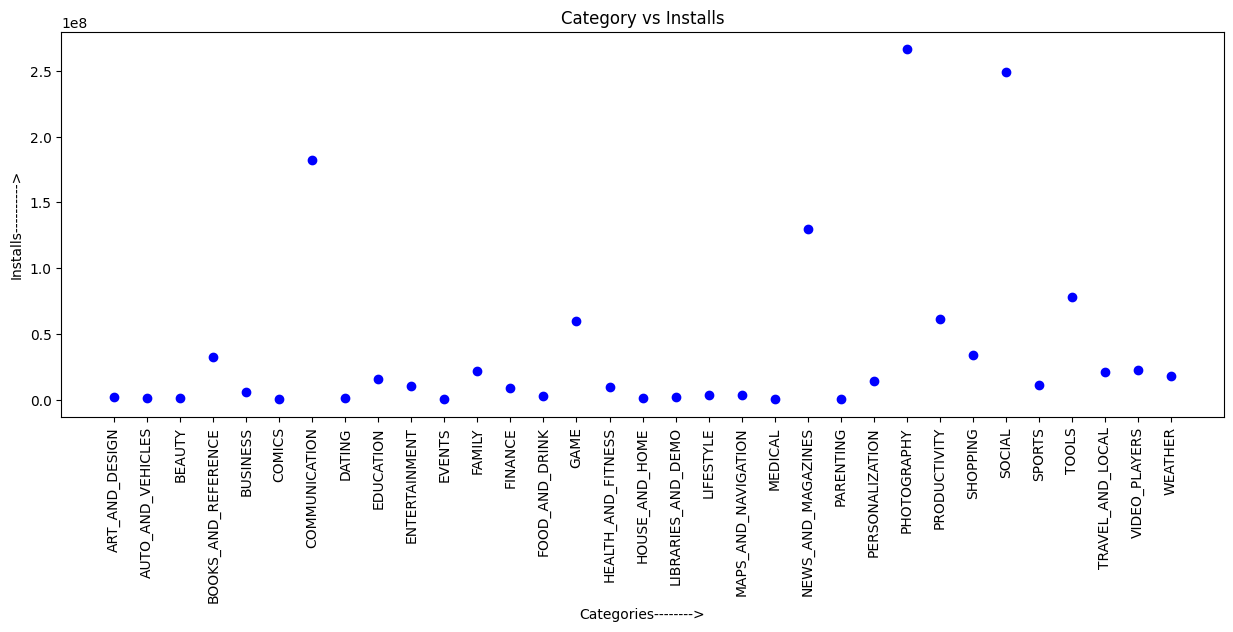

In [308]:
plt.figure(figsize=(15,5))
plt.plot(x,'ro',color='b')
plt.xticks(rotation=90)
plt.title('Category vs Installs')
plt.xlabel('Categories-------->')
plt.ylabel('Installs---------->')
plt.show()

<ipython-input-309-c40662184ad0>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,'r--',color='r')


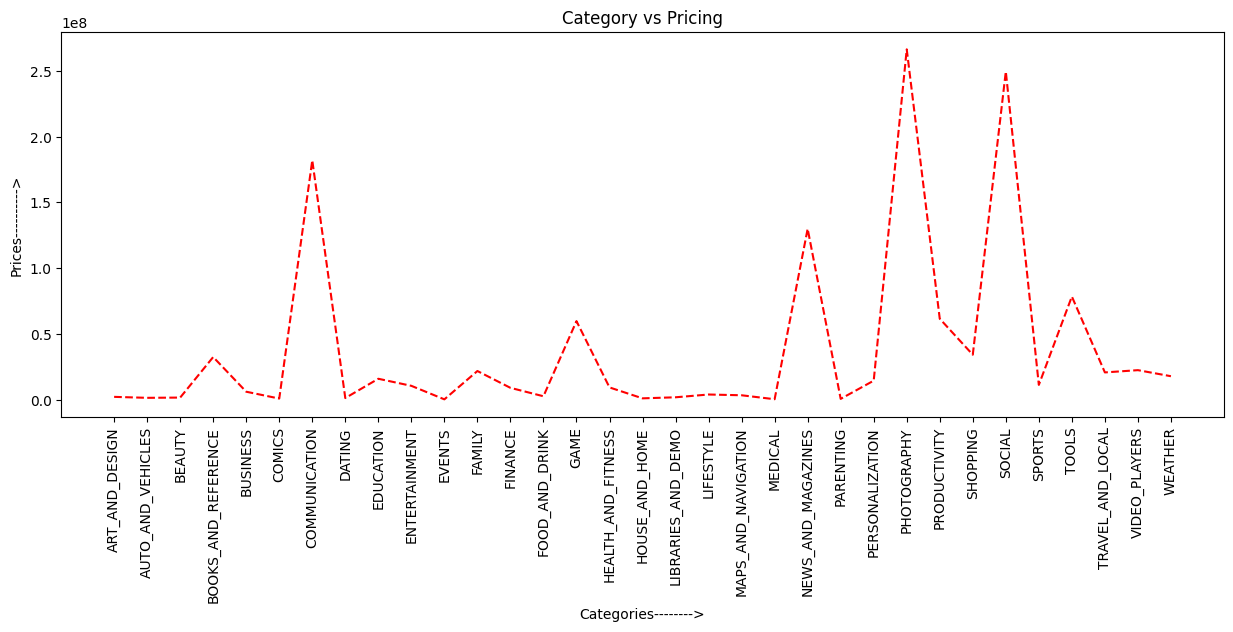

In [309]:
plt.figure(figsize=(15,5))
plt.plot(x,'r--',color='r')
plt.xticks(rotation=90)
plt.title('Category vs Pricing')
plt.xlabel('Categories-------->')
plt.ylabel('Prices---------->')
plt.show()

<ipython-input-310-0928babd0065>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g^" (-> color='g'). The keyword argument will take precedence.
  plt.plot(z,'g^',color='g')


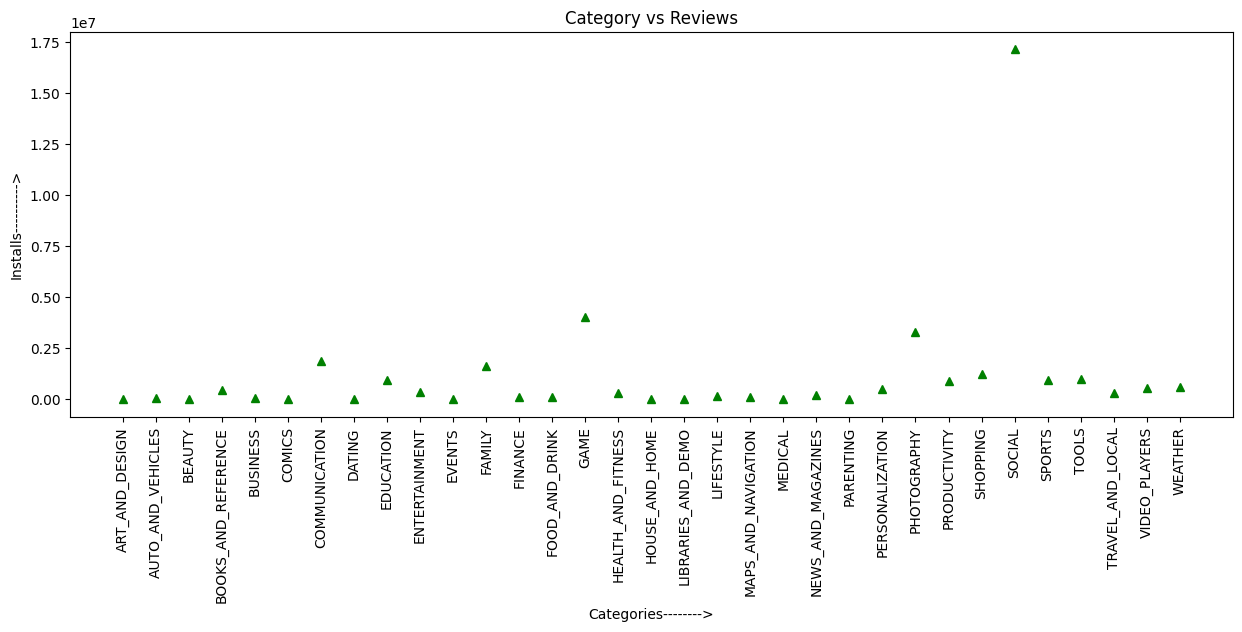

In [310]:
plt.figure(figsize=(15,5))
plt.plot(z,'g^',color='g')
plt.xticks(rotation=90)
plt.title('Category vs Reviews')
plt.xlabel('Categories-------->')
plt.ylabel('Installs---------->')
plt.show()